In [132]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [133]:
# matplotlib을 그렸을 때 한글의 깨짐을 없애기 위해서 사용한 코드!
plt.rc('font', family = 'malgun Gothic')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 크롤링한 데이터에 대한 분석 시작!

In [134]:
# df는 데이터 분석을 위해 어느정도 정제가 되어 있는 데이터
# final 과 df의 차이는 층수를 전부 다 고중저로 나누었냐 안나누었냐의 차이
final = pd.read_csv("OPST_final.csv", encoding = 'euc-kr')
df = pd.read_csv('OPST_최종.csv', encoding = 'euc-kr', index_col='Unnamed: 0')
target = pd.read_csv('OPST_target.csv', encoding = 'euc-kr')
display(final)
display(df)
display(target)

,cost,address,opst,floor,space
0,70000,서울시 강북구 미아동,그랜드파크 1동,14,16.78
1,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48
2,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48
3,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48
4,70000,서울시 강북구 미아동,그랜드파크 1동,3,18.48
...,...,...,...,...,...
25318,130000,서울시 양천구 신정동,헤리티지2차 1동,13,27.05
25319,160000,서울시 양천구 신정동,헤리티지2차 1동,중,27.05
25320,150000,서울시 양천구 신정동,헤리티지2차 1동,12,27.05
25321,170000,서울시 양천구 신정동,헤리티지2차 1동,고,27.05


,cost,address,opst,floor,space,city,gu,dong,평수
0,70000,서울시 강북구 미아동,그랜드파크 1동,고,16.78,서울시,강북구,미아동,5.1
1,80000,서울시 강북구 미아동,그랜드파크 1동,고,18.48,서울시,강북구,미아동,5.6
2,80000,서울시 강북구 미아동,그랜드파크 1동,고,18.48,서울시,강북구,미아동,5.6
3,80000,서울시 강북구 미아동,그랜드파크 1동,고,18.48,서울시,강북구,미아동,5.6
4,70000,서울시 강북구 미아동,그랜드파크 1동,저,18.48,서울시,강북구,미아동,5.6
...,...,...,...,...,...,...,...,...,...
25318,130000,서울시 양천구 신정동,헤리티지1차 1동,중,28.47,서울시,양천구,신정동,8.6
25319,93000,서울시 양천구 신정동,헤리티지1차 1동,저,17.98,서울시,양천구,신정동,5.4
25320,150000,서울시 양천구 신정동,헤리티지2차 1동,고,27.05,서울시,양천구,신정동,8.2
25321,160000,서울시 양천구 신정동,헤리티지2차 1동,중,27.05,서울시,양천구,신정동,8.2


,gu,opst,cost,평수,floor
0,종로구,르메이에르종로타운 1동,240000.0,17.1,고
1,종로구,루비온 1동,100000.0,5.5,중
2,종로구,루비온 1동,100000.0,5.5,고
3,종로구,루비온 1동,100000.0,5.5,고
4,종로구,루비온 1동,100000.0,5.5,고
...,...,...,...,...,...
836,영등포구,여의도리버캐슬2차 1동,80000.0,7.0,저
837,영등포구,여의도리버캐슬2차 1동,80000.0,7.0,중
838,영등포구,여의도리버캐슬2차 1동,80000.0,6.6,중
839,영등포구,여의도리버캐슬2차 1동,80000.0,6.6,중


In [83]:
# 크롤링한 data set의 column에서 관리비에 영향을 끼칠만한 column을 구 단위별로 묶어서 다시 dff로 정의
dff = df.groupby(['gu']).agg({'cost' : 'mean', 'opst':'count','평수':'median'});dff

,cost,opst,평수
gu,,,
강남구,208327.672104,2452,9.70
강동구,110090.909091,814,8.55
강북구,100152.647975,321,7.70
강서구,93965.488215,2376,8.50
관악구,111046.274971,851,5.80
광진구,143729.885057,696,8.10
구로구,105562.852113,1136,8.60
금천구,82850.883652,1358,7.75
노원구,125278.884462,251,9.20


In [84]:
# 동별로 묶기엔 너무 많기도 하며 그래프로 시각화 분석내용을 나타내는 것에 있어서 어려움이 있을 것이라고 판단
df.dong.unique()

array(['미아동', '번동', '수유동', '가양동', '공항동', '내발산동', '등촌동', '마곡동', '방화동',
       '염창동', '화곡동', '광장동', '구의동', '군자동', '능동', '자양동', '중곡동', '화양동',
       '답십리동', '신설동', '용두동', '이문동', '장안동', '전농동', '제기동', '청량리동', '휘경동',
       '남가좌동', '대현동', '미근동', '북가좌동', '북아현동', '연희동', '창천동', '충정로2가',
       '충정로3가', '합동', '홍은동', '반포동', '방배동', '서초동', '신원동', '양재동', '우면동',
       '잠원동', '도봉동', '방학동', '쌍문동', '창동', '개포동', '논현동', '대치동', '도곡동',
       '삼성동', '세곡동', '수서동', '신사동', '역삼동', '자곡동', '청담동', '가산동', '독산동',
       '시흥동', '강일동', '고덕동', '길동', '둔촌동', '명일동', '성내동', '암사동', '천호동',
       '가리봉동', '개봉동', '고척동', '구로동', '신도림동', '오류동', '천왕동', '당산동', '당산동1가',
       '당산동2가', '당산동3가', '당산동4가', '당산동5가', '당산동6가', '대림동', '도림동', '문래동1가',
       '문래동3가', '문래동5가', '문래동6가', '신길동', '양평동1가', '양평동2가', '양평동3가',
       '양평동4가', '양평동5가', '양평동6가', '여의도동', '영등포동', '영등포동1가', '영등포동2가',
       '영등포동3가', '영등포동4가', '영등포동5가', '영등포동6가', '영등포동7가', '영등포동8가',
       '금호동1가', '도선동', '마장동', '상왕십리동', '성수동1가', '성수동2가', '옥수동', '용답동',
       '하왕십리동', '

구 별 평균 관리비는 어떻게 형성이 되어 있고 서울시 전체의 평균관리비는 어느정도 인지 분석  <br/>
구 별 오피스텔의 매물 수는 이 관리비의 가격이 어느정도의 매물이 있었을 때의 형성가 인지도 알려주기 위함  <br/>
 Why? <br/>
 매물 수에 대한 분석? <br/>
 Think   <br/>
 매물 수가 많다면 어느정도 평균적인 관리비가 형성되었다고 할 수 있지만 그게 아니라면 매물 수에 따른 변동이 크기 때문에

#### 구별 평균 관리비(원)

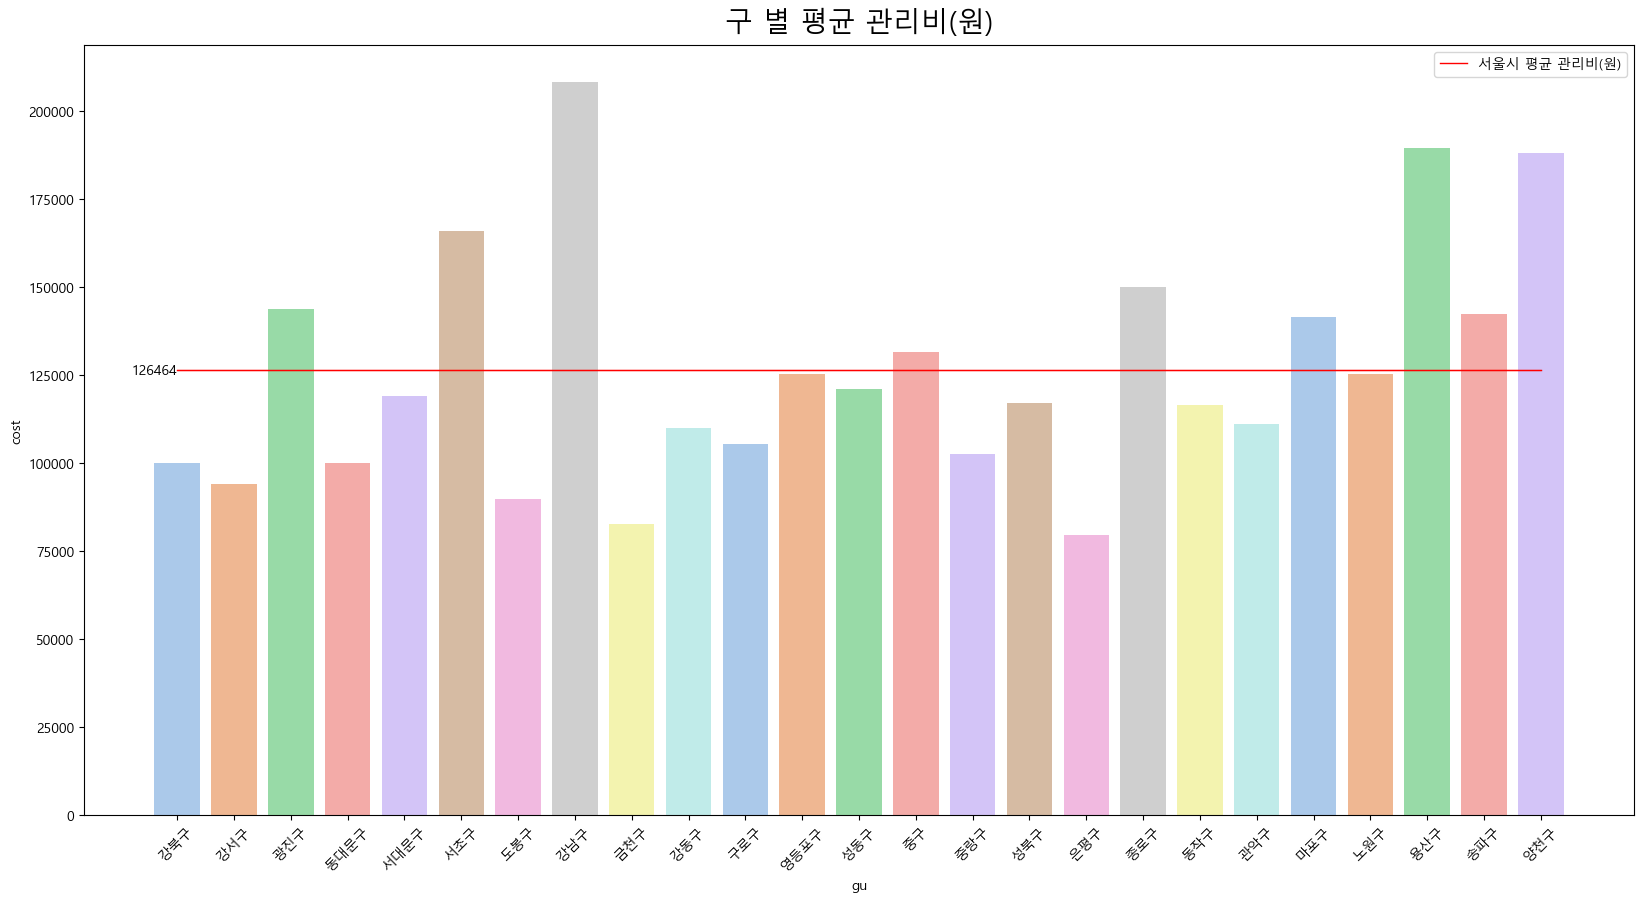

In [87]:
plt.figure(figsize = (20,10))
plt.title('구 별 평균 관리비(원)', pad = 10, fontsize = 20)
sns.barplot(x = 'gu', y = 'cost', data = df, palette = 'pastel', errorbar = None)
sns.lineplot(x = df['gu'], y = dff['cost'].mean(), linewidth = 1, color = 'red', label = '서울시 평균 관리비(원)')
plt.legend()
plt.xticks(rotation = 45)
plt.text('강북구',dff['cost'].mean()-2000, '%.0f' %dff['cost'].mean(), ha = 'right', va = 'bottom', size = 10)
plt.show()

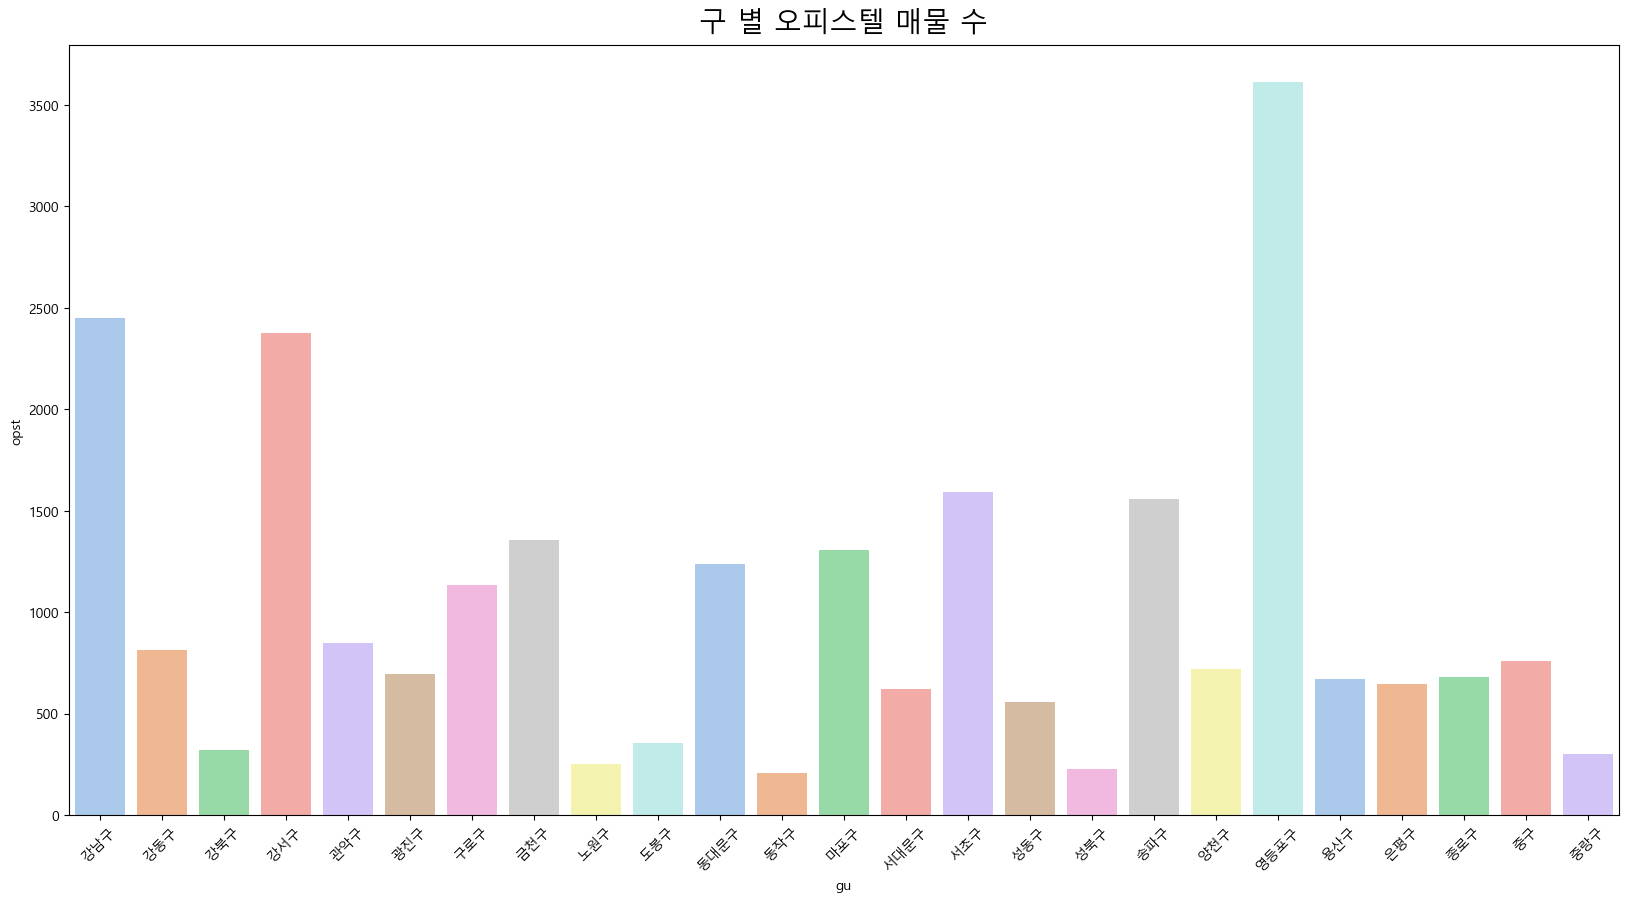

In [88]:
plt.figure(figsize = (20,10))
plt.title('구 별 오피스텔 매물 수', pad = 10, fontsize = 20)
sns.barplot(x='gu', y='opst', data= dff.reset_index() ,palette = 'pastel', errorbar=None)
plt.xticks(rotation = 45)
plt.show()

### 

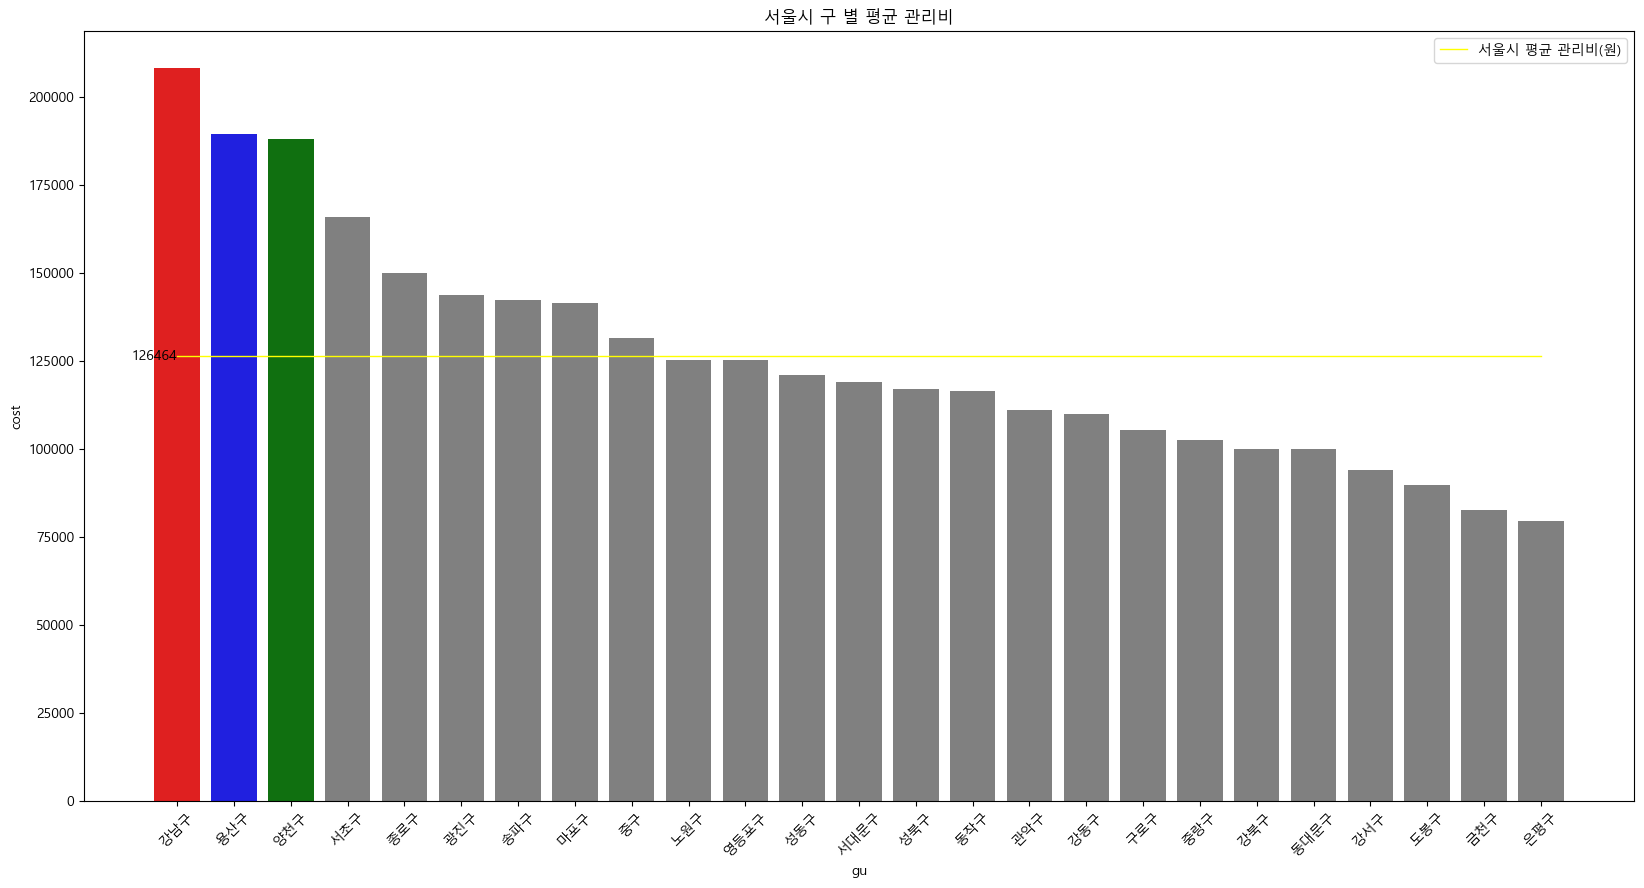

In [89]:
plt.figure(figsize = (20,10))
sns.barplot(x='gu', y='cost', data= dff.reset_index().sort_values('cost', ascending = False), errorbar=None,
            palette = ['#FF0000','#0000FF','#008000','#808080','#808080','#808080','#808080','#808080','#808080','#808080'
                     ,'#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080'
                     ,'#808080','#808080','#808080','#808080','#808080','#808080'])
sns.lineplot(x=dff.reset_index().sort_values('cost', ascending=False)['gu'], y=dff['cost'].mean(), linewidth=1, color='yellow', label= "서울시 평균 관리비(원)")
plt.legend(loc = 'upper right')
plt.text(0 ,dff['cost'].mean()-2000, '%.0f' %dff['cost'].mean(), ha = 'right', va = 'bottom', size = 10)
plt.title("서울시 구 별 평균 관리비")
plt.xticks(rotation = 45)
plt.show()

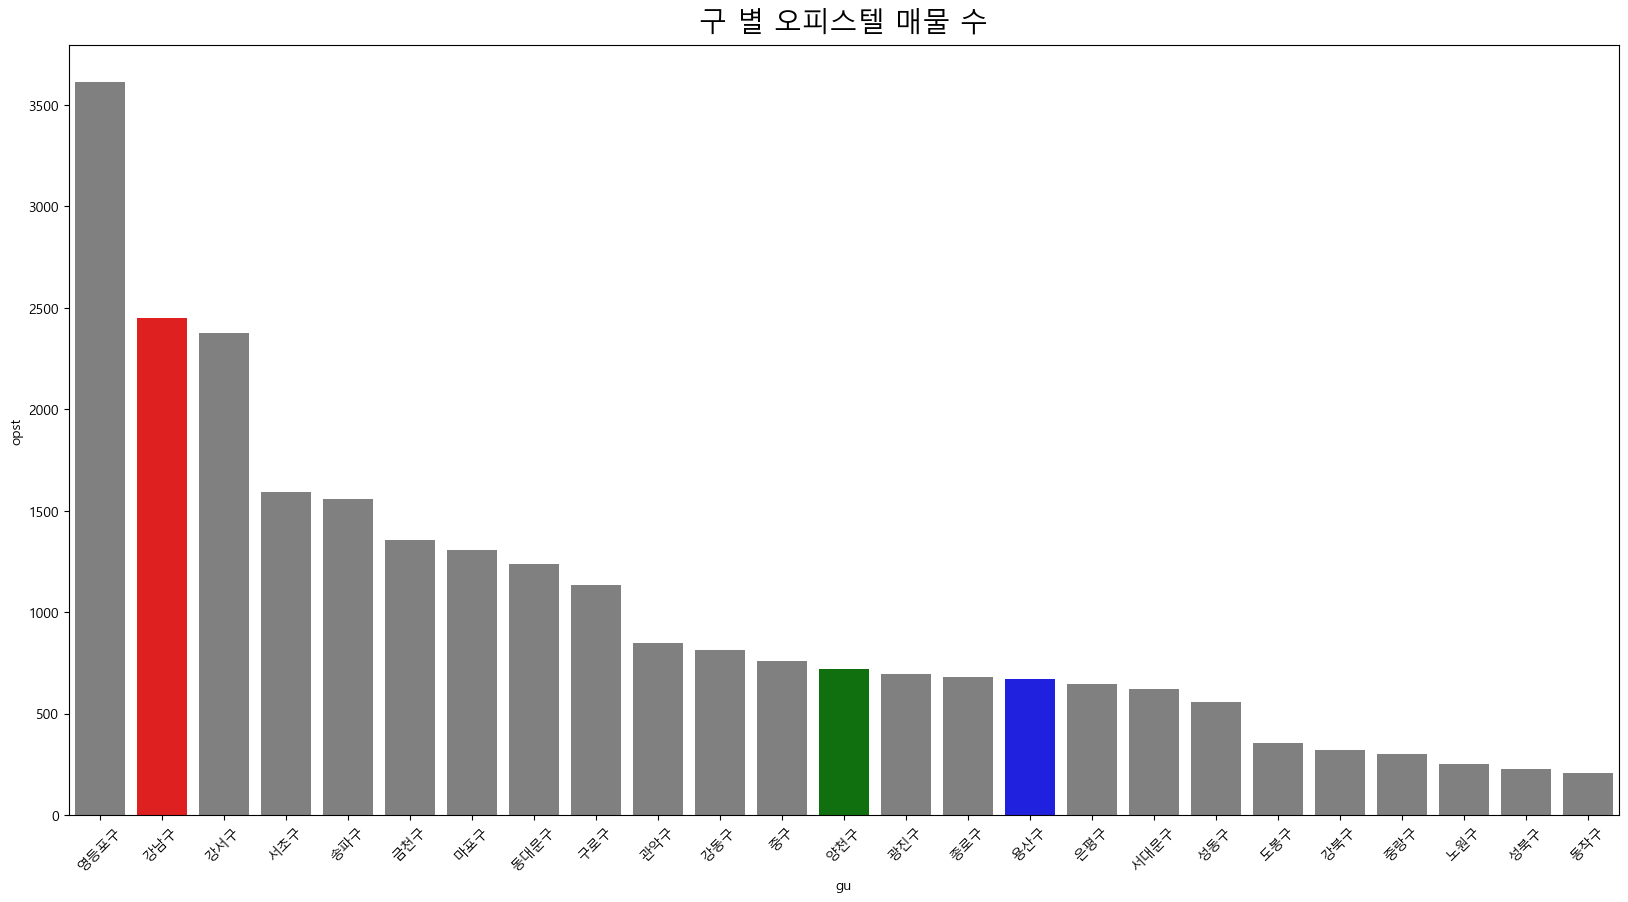

In [90]:
plt.figure(figsize = (20,10))
plt.title('구 별 오피스텔 매물 수', pad = 10, fontsize = 20)
sns.barplot(x='gu', y='opst', data= dff.reset_index().sort_values('opst',ascending = False) , 
            palette = ['#808080','#FF0000','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080'
                       ,'#808080','#808080','#008000','#808080','#808080','#0000FF','#808080','#808080','#808080'
                       ,'#808080','#808080','#808080','#808080','#808080','#808080'], errorbar=None)
plt.xticks(rotation = 45)
plt.show()

구별 평균 관리비의 시각화 결과 서울 전체 평균 126,000원에 비해 <br/>
강남구, 용산구, 양천구 상위 3개 구의 평균은 200,000원 근처에 매우 높게 형성 <br/>
관리비 상승 요건 파악을 위해 이후 해당 3개 구 데이터를 집중적으로 분석하기로 결정


#### 서울시 top3 구의 동별 평균 관리비(원)

In [91]:
my_agg = df.groupby(['gu'])[['cost']].mean().reset_index().sort_values('cost', ascending=False).head(3);my_agg

,gu,cost
0,강남구,208327.672104
20,용산구,189513.392857
18,양천구,188215.767635


In [92]:
# top3 에 대한 분석 시각화 자료를 그리기 위한 사용자 함수 정의
def cost(gu, loc, color):
    z = df[df['gu'] == gu]
    sns.barplot(x='dong', y='cost', data= z.groupby(['dong'])[['cost']].mean().reset_index().sort_values('cost',ascending=False), color=color, errorbar=None, ax=ax[loc])
    sns.lineplot(x=z['dong'], y=z['cost'].mean(), linewidth=1, color='yellow', label= f"{gu} 평균 관리비(원)", ax = ax[loc])
    ax[loc].legend(loc = 'upper right')
    ax[loc].text(0,z['cost'].mean()-2000, '%.0f' %z['cost'].mean(), ha = 'right', va = 'bottom', size = 10)
    ax[loc].set_title(f"{gu} 동 별 평균 관리비")
    ax[loc].tick_params(axis = 'x',
                    rotation = 45)
def opst(gu, loc,color):
    z = df[df['gu'] == gu]
    sns.barplot(x='dong', y='opst', data= z.groupby(['dong'])[['opst']].count().reset_index().sort_values('opst',ascending=False), color=color, errorbar=None, ax=ax[loc])
    ax[loc].set_title(f"{gu} 동 별 오피스텔 매물 수")
    ax[loc].tick_params(axis = 'x',
                    rotation = 45)

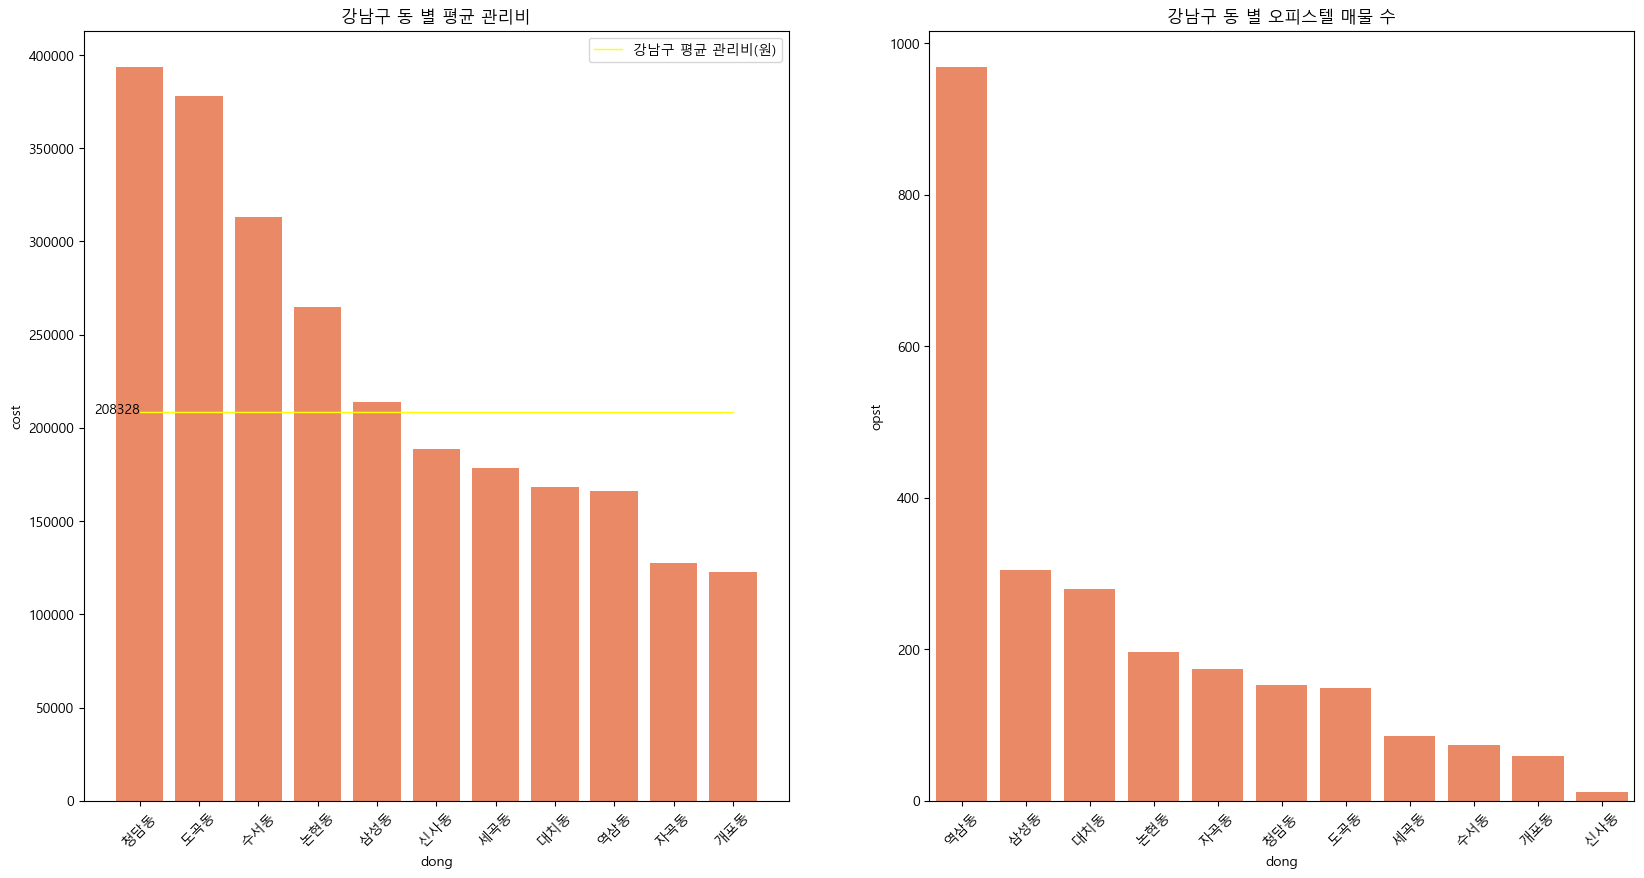

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(20,10), dpi = 100)

cost('강남구',0,'#FF7F50')
opst('강남구',1,'#FF7F50')

plt.savefig('강남구.png',dpi=100)

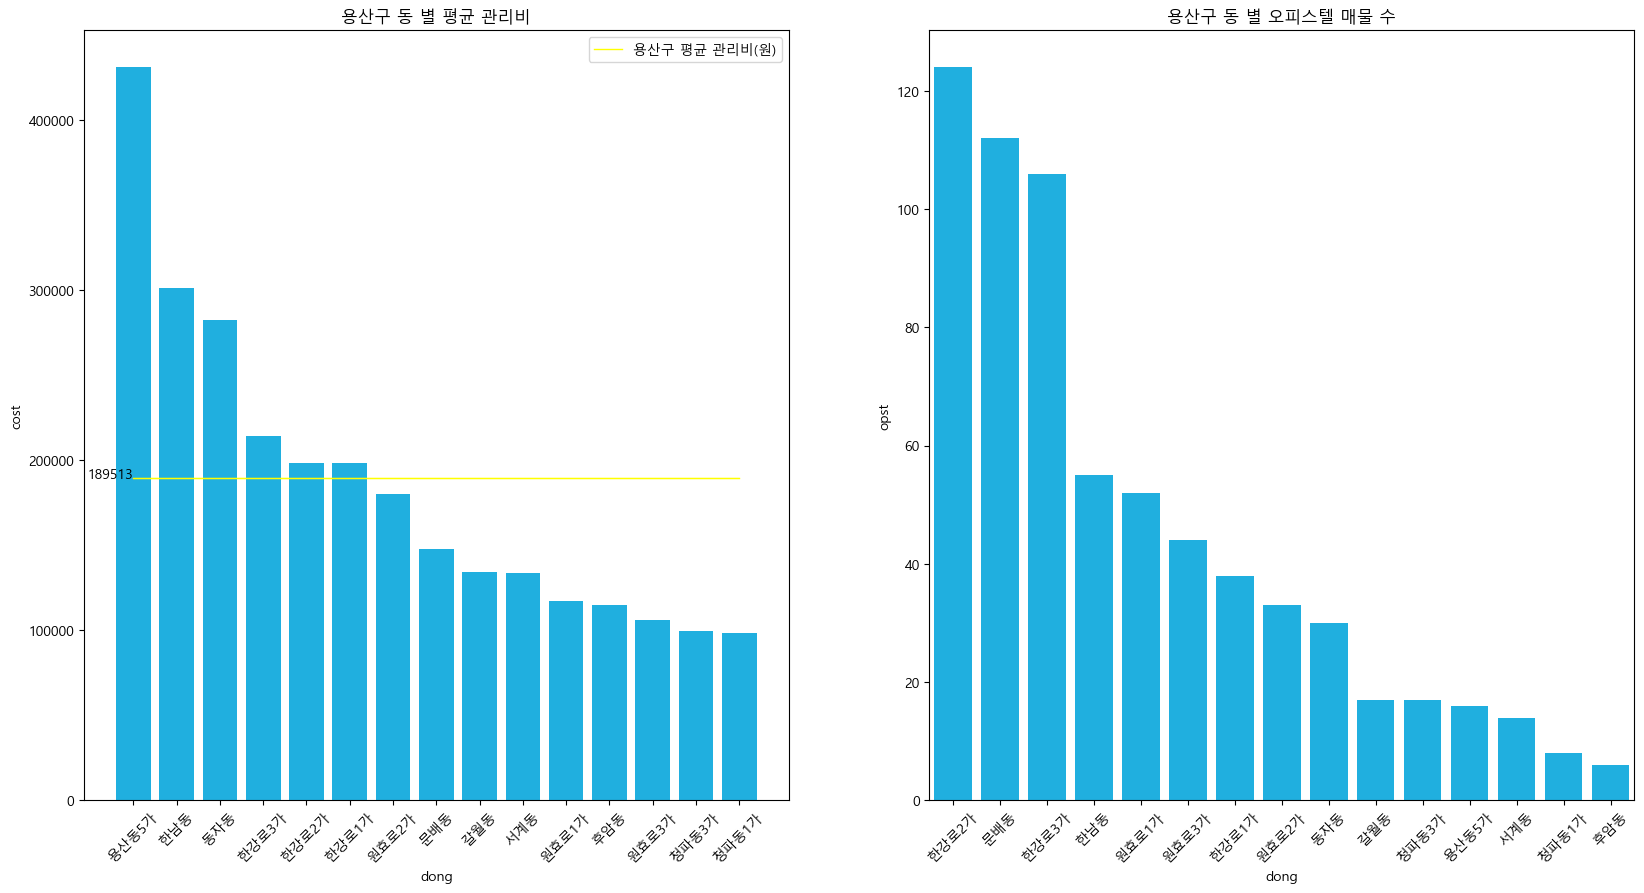

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(20,10), dpi = 100)

cost('용산구',0,'#00BFFF')
opst('용산구',1,'#00BFFF')

plt.savefig('용산구.png',dpi=100)

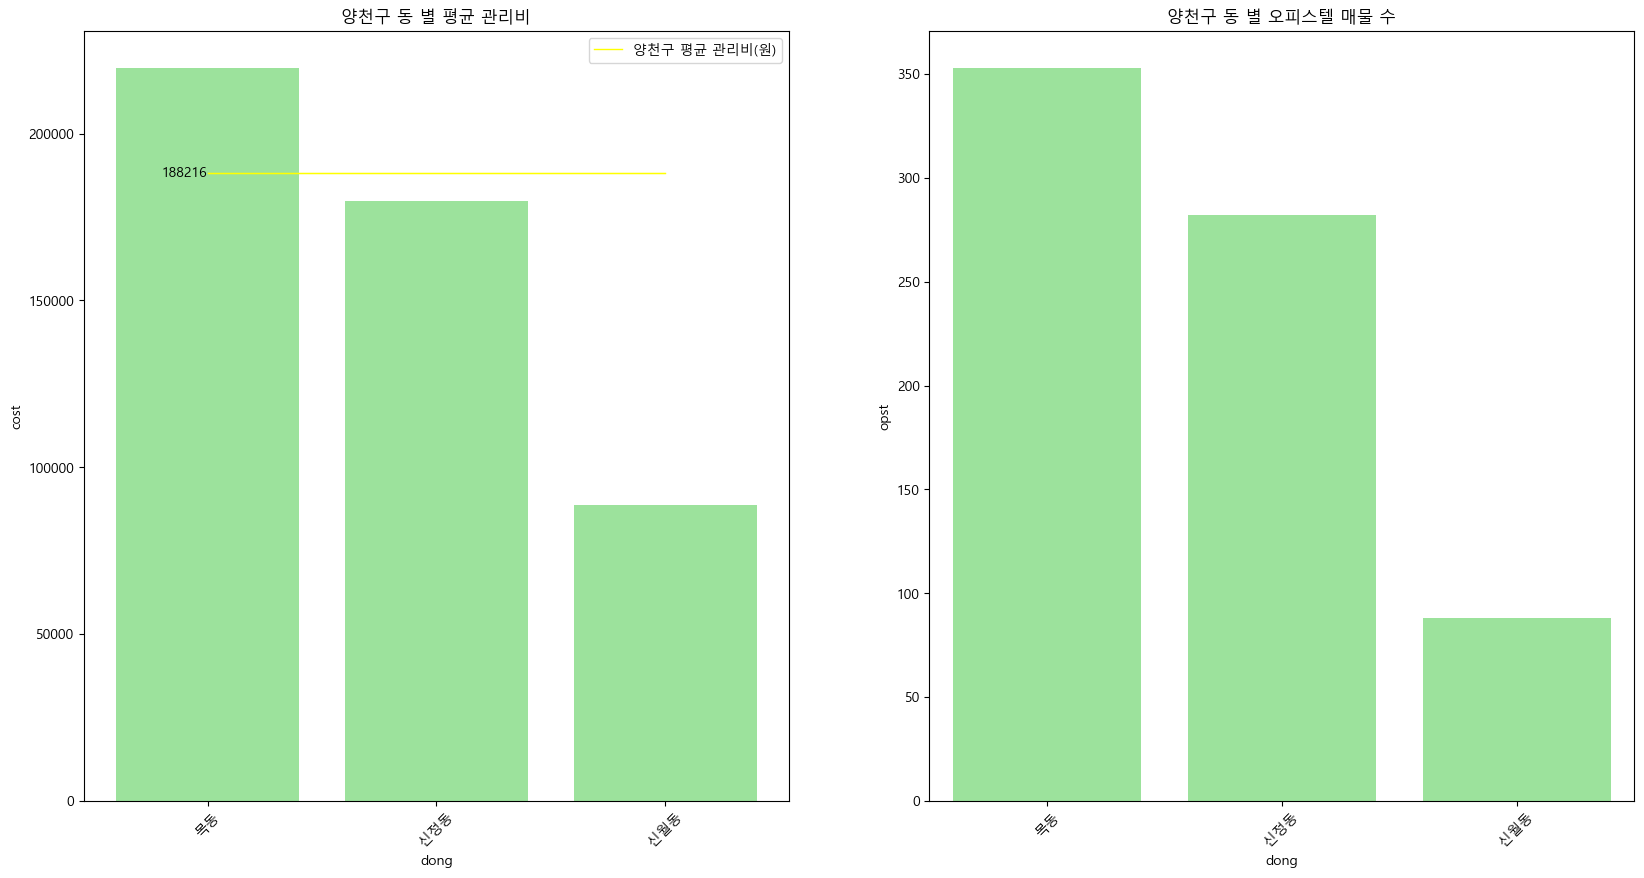

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(20,10), dpi = 100)

cost('양천구',0,'#90EE90')
opst('양천구',1,'#90EE90')

plt.savefig('양천구.png',dpi=100)

같은 자치구 내에서도 극명한 관리비의 차이가 존재 <br/>
따라서 지역 유사도는 존재하지만 지역적 특성을 이외의 다른 구조적 특성들이 반영되어야겠다고 생각

In [97]:
df_강남 = df[df['gu'] == '강남구']
df_강남 = df_강남.groupby(['dong'])[['opst','cost','평수']].apply(lambda x : x).reset_index()

df_용산 = df[df['gu'] == '용산구']
df_용산 = df_용산.groupby(['dong'])[['opst','cost','평수']].apply(lambda x : x).reset_index()

df_양천 = df[df['gu'] == '양천구']
df_양천 = df_양천.groupby(['dong'])[['opst','cost','평수']].apply(lambda x : x).reset_index()

display(df_강남)
display(df_용산)
display(df_양천)

,dong,level_1,opst,cost,평수
0,개포동,4768,골든빌 1동,130000,7.1
1,개포동,4769,골든빌 1동,140000,5.7
2,개포동,4770,골든빌 1동,140000,7.2
3,개포동,4771,골든빌 1동,130000,7.2
4,개포동,4772,골든빌 1동,140000,5.7
...,...,...,...,...,...
2447,청담동,21179,현대리버스텔 1동,150000,7.6
2448,청담동,21180,현대리버스텔 1동,200000,7.6
2449,청담동,21181,현대리버스텔 1동,150000,7.6
2450,청담동,21182,현대리버스텔 1동,150000,7.6


,dong,level_1,opst,cost,평수
0,갈월동,15616,갈월에이트리움-고려 1동,120000,9.5
1,갈월동,15617,갈월에이트리움-고려 1동,150000,9.5
2,갈월동,15618,갈월에이트리움-고려 1동,150000,10.3
3,갈월동,15619,갈월에이트리움-고려 1동,120000,9.4
4,갈월동,24473,갈월에이트리움-고려 1동,120000,10.2
...,...,...,...,...,...
667,후암동,16035,장우 1동,110000,10.4
668,후암동,16036,장우 1동,100000,10.4
669,후암동,16037,장우 1동,110000,10.4
670,후암동,16038,장우 1동,110000,10.4


,dong,level_1,opst,cost,평수
0,목동,17250,그라비스 1동,60000,9.0
1,목동,17251,그라비스 1동,60000,9.0
2,목동,17252,그라비스 1동,80000,9.0
3,목동,17253,그라비스 1동,60000,9.0
4,목동,17254,그라비스 1동,80000,9.0
...,...,...,...,...,...
718,신정동,25318,헤리티지1차 1동,130000,8.6
719,신정동,25319,헤리티지1차 1동,93000,5.4
720,신정동,25320,헤리티지2차 1동,150000,8.2
721,신정동,25321,헤리티지2차 1동,160000,8.2


다른 구조적 특성 중에 cos

<Figure size 2000x1000 with 0 Axes>

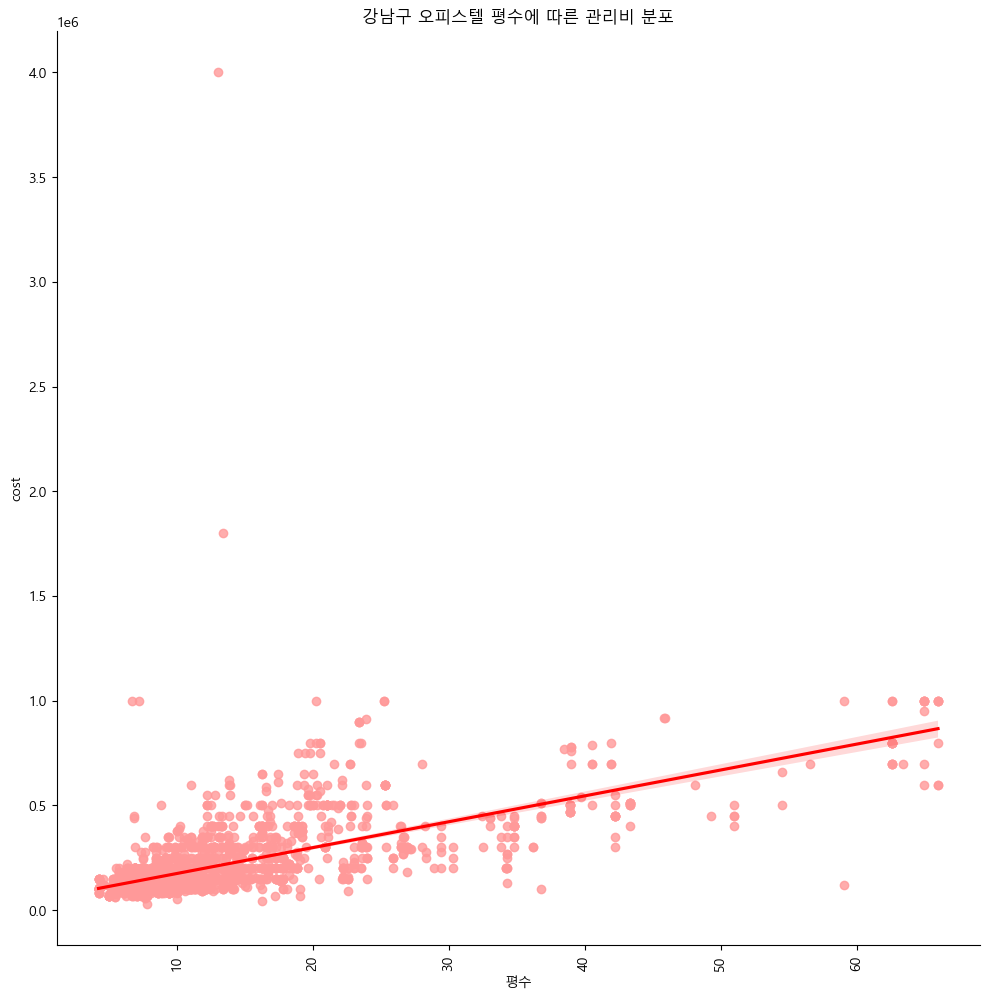

In [98]:
plt.figure(figsize =(20,10))

sns.lmplot(x='평수', y='cost',height= 10, data = df_강남,scatter_kws={'color': '#FF9999'},  
           line_kws={'color': '#FF0000'})
plt.title("강남구 오피스텔 평수에 따른 관리비 분포")
plt.xticks(rotation = 90) 
plt.show()

<Figure size 2000x1000 with 0 Axes>

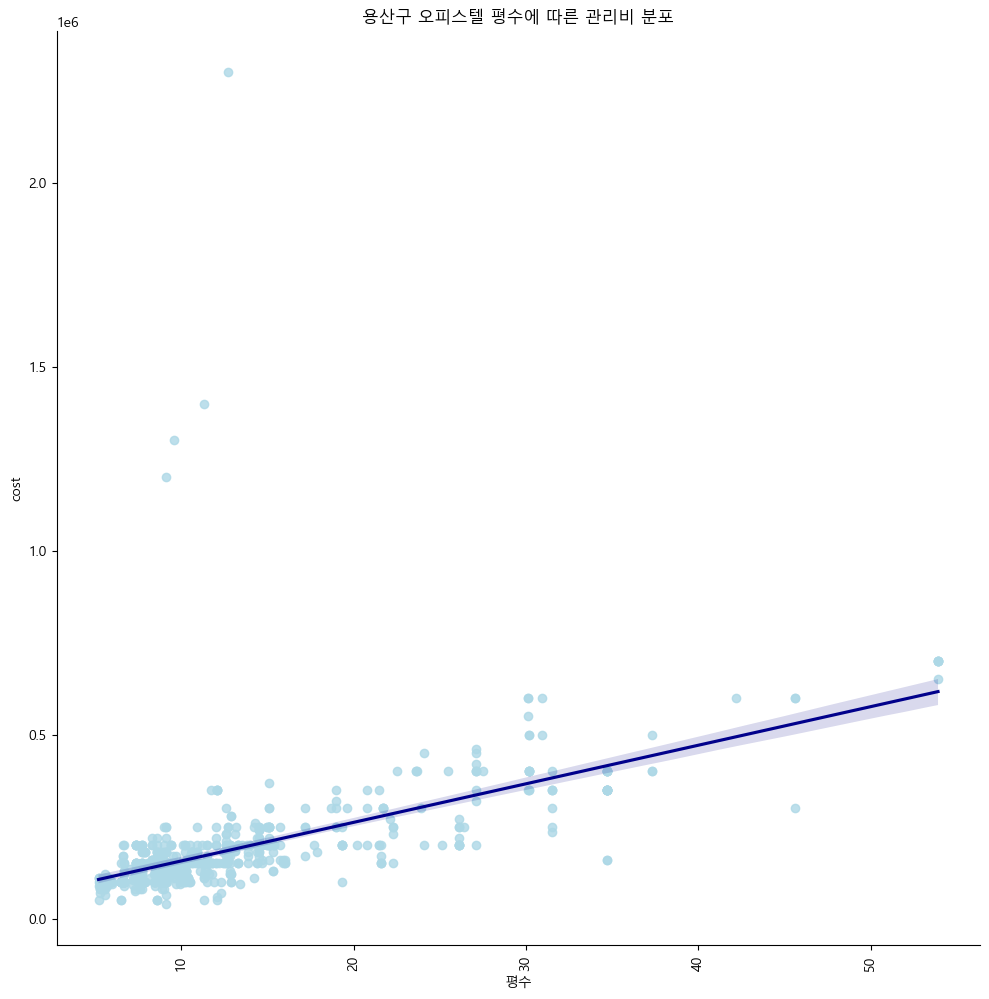

In [99]:
plt.figure(figsize =(20,10))

sns.lmplot(x='평수', y='cost',height= 10, data = df_용산,scatter_kws={'color': '#ADD8E6'},  
           line_kws={'color': '#00008B'})
plt.title("용산구 오피스텔 평수에 따른 관리비 분포")
plt.xticks(rotation = 90) 
plt.show()

<Figure size 2000x1000 with 0 Axes>

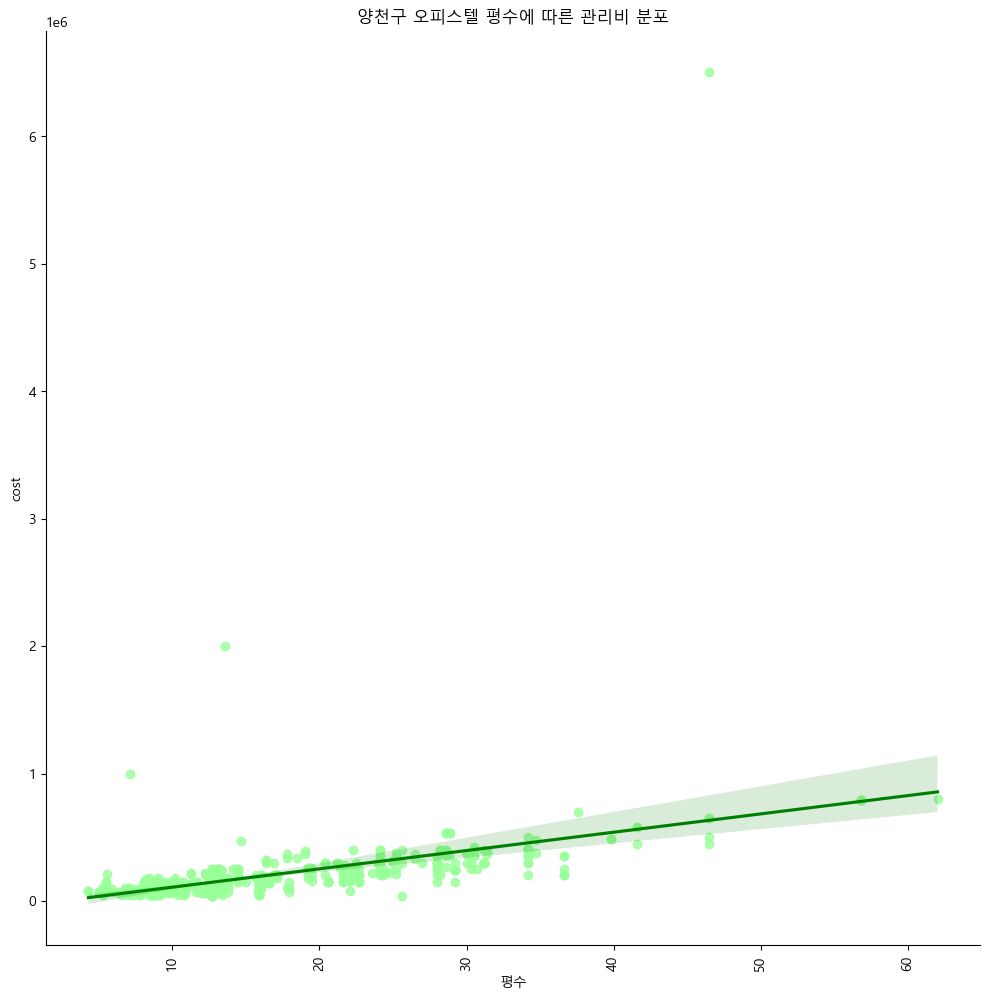

In [100]:
plt.figure(figsize =(20,10))

sns.lmplot(x='평수', y='cost',height= 10, data = df_양천,scatter_kws={'color': '#99FF99'},  
           line_kws={'color': '#008000'})
plt.title("양천구 오피스텔 평수에 따른 관리비 분포")
plt.xticks(rotation = 90) 
plt.show()

대체적으로 평수가 늘어날 때 관리비가 증가하는 경향을 보이고 있지만 outlier의 영향이 존재한다고 판단하여 각 동별로 outlier를 제거하고 다시 분석하기로 진행

In [101]:
# 각 동별로 Q3 + 1.5 IQR 을 넘는 값은 outlier로 범주하고 삭제하기 위한 limit_dic 생성
def cut_outlier(x):
    limit_dic = {}
    for i in x.dong.unique():
        Q3 = x[x['dong']== i ]['cost'].quantile(.75)
        Q1 = x[x['dong']== i ]['cost'].quantile(.25)
        IQR = Q3 - Q1
        Limit = Q3 + 1.5 * IQR
        limit_dic[i] = {'limit_cost': Limit}
    limit_dic = pd.DataFrame.from_dict(limit_dic).T.reset_index()
    limit_dic.rename(columns= {'index':'dong'},inplace = True)
    return limit_dic

limit_dic = cut_outlier(df)

In [102]:
new_df = pd.merge(df, limit_dic, how ='left',on = 'dong');new_df

,cost,address,opst,floor,space,city,gu,dong,평수,limit_cost
0,70000,서울시 강북구 미아동,그랜드파크 1동,고,16.78,서울시,강북구,미아동,5.1,145000.0
1,80000,서울시 강북구 미아동,그랜드파크 1동,고,18.48,서울시,강북구,미아동,5.6,145000.0
2,80000,서울시 강북구 미아동,그랜드파크 1동,고,18.48,서울시,강북구,미아동,5.6,145000.0
3,80000,서울시 강북구 미아동,그랜드파크 1동,고,18.48,서울시,강북구,미아동,5.6,145000.0
4,70000,서울시 강북구 미아동,그랜드파크 1동,저,18.48,서울시,강북구,미아동,5.6,145000.0
...,...,...,...,...,...,...,...,...,...,...
25318,130000,서울시 양천구 신정동,헤리티지1차 1동,중,28.47,서울시,양천구,신정동,8.6,505000.0
25319,93000,서울시 양천구 신정동,헤리티지1차 1동,저,17.98,서울시,양천구,신정동,5.4,505000.0
25320,150000,서울시 양천구 신정동,헤리티지2차 1동,고,27.05,서울시,양천구,신정동,8.2,505000.0
25321,160000,서울시 양천구 신정동,헤리티지2차 1동,중,27.05,서울시,양천구,신정동,8.2,505000.0


In [103]:
new_df['rule'] = new_df.apply(lambda x: 'ok' if x['cost'] <= x['limit_cost'] else np.nan, axis = 1)
new_df[new_df['rule'].isnull()==True]

,cost,address,opst,floor,space,city,gu,dong,평수,limit_cost,rule
142,180000,서울시 강북구 수유동,에피소드수유838(민간임대) 1동,고,35.44,서울시,강북구,수유동,10.7,172500.0,NaN
164,210000,서울시 강북구 수유동,제네스타워 1동,고,37.80,서울시,강북구,수유동,11.4,172500.0,NaN
266,170000,서울시 강서구 가양동,미씨엘로 1동,저,26.52,서울시,강서구,가양동,8.0,160000.0,NaN
270,170000,서울시 강서구 가양동,미씨엘로 1동,중,29.58,서울시,강서구,가양동,8.9,160000.0,NaN
280,170000,서울시 강서구 가양동,이스타빌1차 1동,중,27.00,서울시,강서구,가양동,8.2,160000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25226,790000,서울시 양천구 목동,현대하이페리온 102동,고,187.68,서울시,양천구,목동,56.8,500000.0,NaN
25228,580000,서울시 양천구 목동,현대하이페리온 102동,저,137.36,서울시,양천구,목동,41.6,500000.0,NaN
25229,790000,서울시 양천구 목동,현대하이페리온 102동,고,187.68,서울시,양천구,목동,56.8,500000.0,NaN
25230,790000,서울시 양천구 목동,현대하이페리온 102동,고,187.68,서울시,양천구,목동,56.8,500000.0,NaN


In [104]:
new_df.dropna(inplace = True)
new_df.drop(columns= ['rule','limit_cost'], axis = 1, inplace = True)
new_df

,cost,address,opst,floor,space,city,gu,dong,평수
0,70000,서울시 강북구 미아동,그랜드파크 1동,고,16.78,서울시,강북구,미아동,5.1
1,80000,서울시 강북구 미아동,그랜드파크 1동,고,18.48,서울시,강북구,미아동,5.6
2,80000,서울시 강북구 미아동,그랜드파크 1동,고,18.48,서울시,강북구,미아동,5.6
3,80000,서울시 강북구 미아동,그랜드파크 1동,고,18.48,서울시,강북구,미아동,5.6
4,70000,서울시 강북구 미아동,그랜드파크 1동,저,18.48,서울시,강북구,미아동,5.6
...,...,...,...,...,...,...,...,...,...
25318,130000,서울시 양천구 신정동,헤리티지1차 1동,중,28.47,서울시,양천구,신정동,8.6
25319,93000,서울시 양천구 신정동,헤리티지1차 1동,저,17.98,서울시,양천구,신정동,5.4
25320,150000,서울시 양천구 신정동,헤리티지2차 1동,고,27.05,서울시,양천구,신정동,8.2
25321,160000,서울시 양천구 신정동,헤리티지2차 1동,중,27.05,서울시,양천구,신정동,8.2


In [105]:
new_df_강남 = new_df[new_df['gu'] == '강남구']
new_df_강남 = new_df_강남.groupby(['dong'])[['opst','cost','평수']].apply(lambda x : x).reset_index()

new_df_용산 = new_df[new_df['gu'] == '용산구']
new_df_용산 = new_df_용산.groupby(['dong'])[['opst','cost','평수']].apply(lambda x : x).reset_index()

new_df_양천 = new_df[new_df['gu'] == '양천구']
new_df_양천 = new_df_양천.groupby(['dong'])[['opst','cost','평수']].apply(lambda x : x).reset_index()

display(new_df_강남)
display(new_df_용산)
display(new_df_양천)

,dong,level_1,opst,cost,평수
0,개포동,4768,골든빌 1동,130000,7.1
1,개포동,4769,골든빌 1동,140000,5.7
2,개포동,4770,골든빌 1동,140000,7.2
3,개포동,4771,골든빌 1동,130000,7.2
4,개포동,4772,골든빌 1동,140000,5.7
...,...,...,...,...,...
2217,청담동,21179,현대리버스텔 1동,150000,7.6
2218,청담동,21180,현대리버스텔 1동,200000,7.6
2219,청담동,21181,현대리버스텔 1동,150000,7.6
2220,청담동,21182,현대리버스텔 1동,150000,7.6


,dong,level_1,opst,cost,평수
0,갈월동,15616,갈월에이트리움-고려 1동,120000,9.5
1,갈월동,15617,갈월에이트리움-고려 1동,150000,9.5
2,갈월동,15618,갈월에이트리움-고려 1동,150000,10.3
3,갈월동,15619,갈월에이트리움-고려 1동,120000,9.4
4,갈월동,24473,갈월에이트리움-고려 1동,120000,10.2
...,...,...,...,...,...
644,후암동,16035,장우 1동,110000,10.4
645,후암동,16036,장우 1동,100000,10.4
646,후암동,16037,장우 1동,110000,10.4
647,후암동,16038,장우 1동,110000,10.4


,dong,level_1,opst,cost,평수
0,목동,17250,그라비스 1동,60000,9.0
1,목동,17251,그라비스 1동,60000,9.0
2,목동,17252,그라비스 1동,80000,9.0
3,목동,17253,그라비스 1동,60000,9.0
4,목동,17254,그라비스 1동,80000,9.0
...,...,...,...,...,...
686,신정동,25318,헤리티지1차 1동,130000,8.6
687,신정동,25319,헤리티지1차 1동,93000,5.4
688,신정동,25320,헤리티지2차 1동,150000,8.2
689,신정동,25321,헤리티지2차 1동,160000,8.2


<Figure size 2000x1000 with 0 Axes>

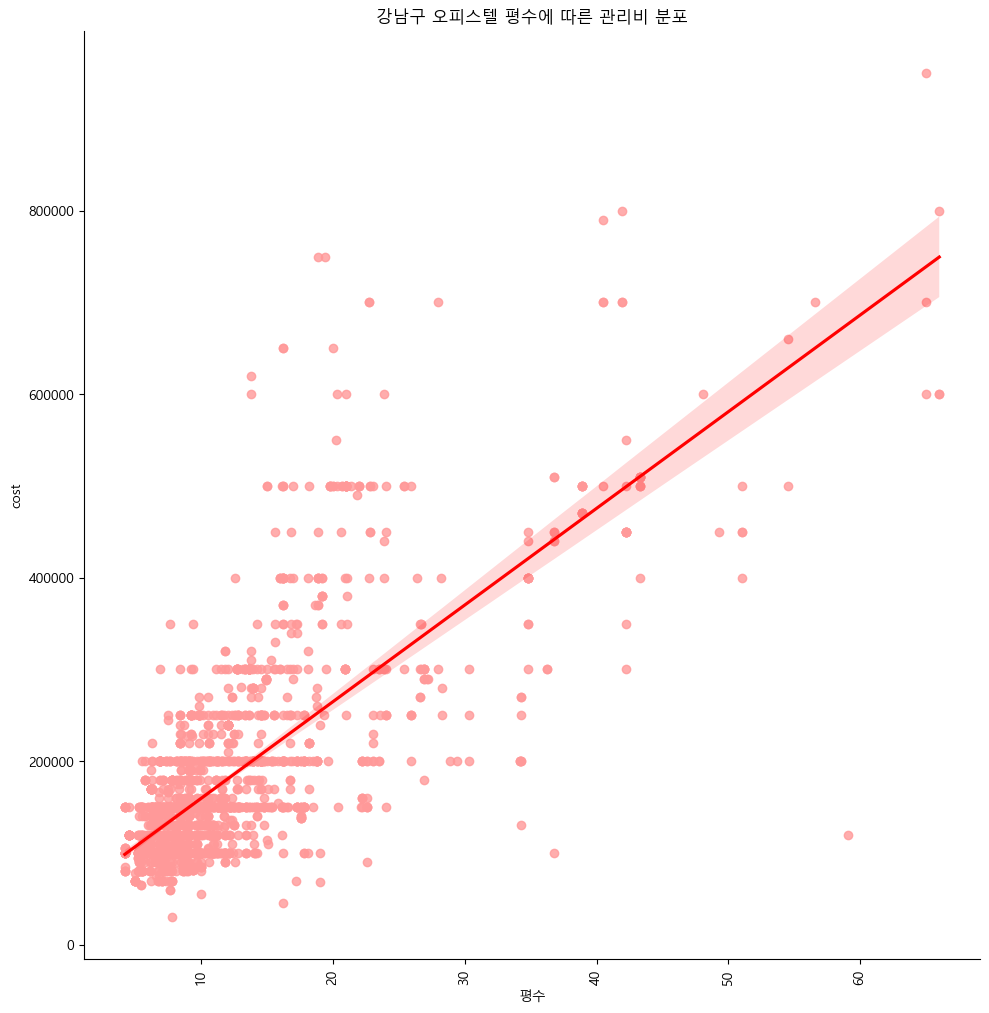

In [110]:
plt.figure(figsize =(20,10))

sns.lmplot(x='평수', y='cost',height= 10, data = new_df_강남,scatter_kws={'color': '#FF9999'},  
           line_kws={'color': '#FF0000'})

plt.title("강남구 오피스텔 평수에 따른 관리비 분포")
plt.xticks(rotation = 90) 
plt.show()

<Figure size 2000x1000 with 0 Axes>

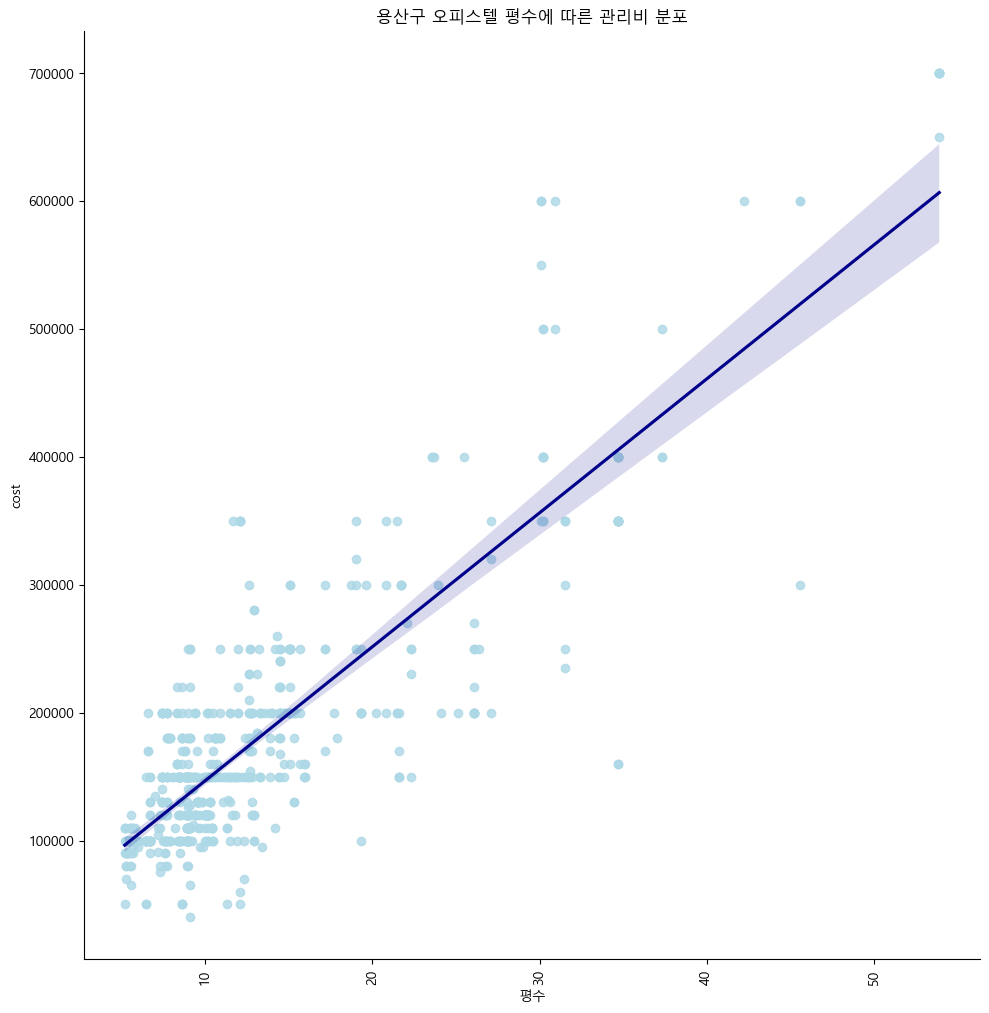

In [111]:
plt.figure(figsize =(20,10))

sns.lmplot(x='평수', y='cost',height= 10, data = new_df_용산,scatter_kws={'color': '#ADD8E6'},  
           line_kws={'color': '#00008B'})
plt.title("용산구 오피스텔 평수에 따른 관리비 분포")
plt.xticks(rotation = 90) 
plt.show()

<Figure size 2000x1000 with 0 Axes>

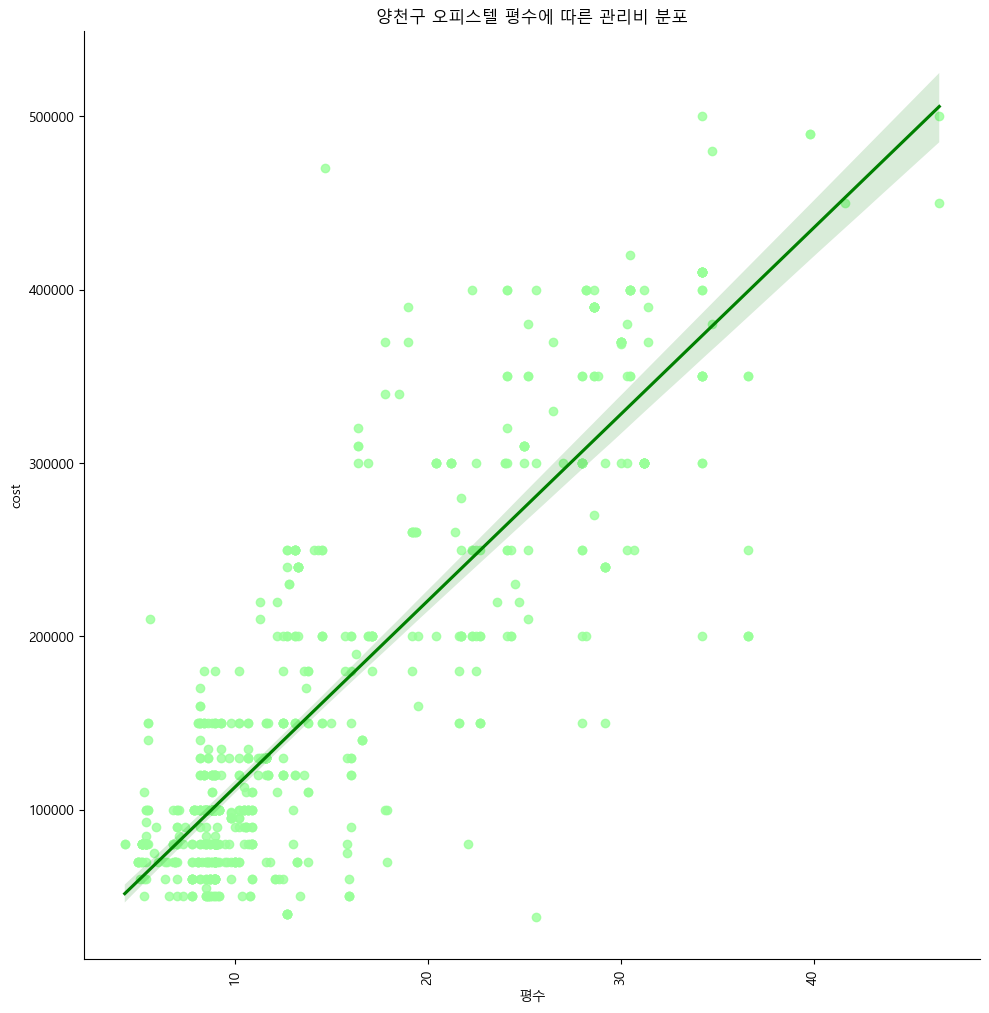

In [112]:
plt.figure(figsize =(20,10))


sns.lmplot(x='평수', y='cost',height= 10, data = new_df_양천,scatter_kws={'color': '#99FF99'},  
           line_kws={'color': '#008000'})
plt.title("양천구 오피스텔 평수에 따른 관리비 분포")
plt.xticks(rotation = 90) 
plt.show()

층수에 대한 관리비의 상관계관에 대한 분석

In [123]:
final.drop(index = list(final[final['cost'] == '0'].index), inplace = True)
final.drop(index = list(final[final['cost'] == 0].index), inplace = True)
city,gu,dong = [],[],[]
for i in final['address']:
    if i != '0':
        city.append(i.split()[0])
        gu.append(i.split()[1])
        dong.append(i.split()[2])
    else:
        continue
final['city'] = city
final['gu'] = gu
final['dong'] = dong
final

,cost,address,opst,floor,space,city,gu,dong
0,70000,서울시 강북구 미아동,그랜드파크 1동,14,16.78,서울시,강북구,미아동
1,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48,서울시,강북구,미아동
2,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48,서울시,강북구,미아동
3,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48,서울시,강북구,미아동
4,70000,서울시 강북구 미아동,그랜드파크 1동,3,18.48,서울시,강북구,미아동
...,...,...,...,...,...,...,...,...
25318,130000,서울시 양천구 신정동,헤리티지2차 1동,13,27.05,서울시,양천구,신정동
25319,160000,서울시 양천구 신정동,헤리티지2차 1동,중,27.05,서울시,양천구,신정동
25320,150000,서울시 양천구 신정동,헤리티지2차 1동,12,27.05,서울시,양천구,신정동
25321,170000,서울시 양천구 신정동,헤리티지2차 1동,고,27.05,서울시,양천구,신정동


In [125]:
#앞에 진행했던 것과 동일한 조건을 맞추기 위해 진행 (outlier 제거)
limit_dic = cut_outlier(final)

new_final = pd.merge(final, limit_dic, how ='left',on = 'dong');new_final

new_final['rule'] = new_final.apply(lambda x: 'ok' if x['cost'] <= x['limit_cost'] else np.nan, axis = 1)
new_final[new_final['rule'].isnull()==True]

new_final.dropna(inplace = True)
new_final.drop(columns= ['rule','limit_cost'], axis = 1, inplace = True)
new_final

,cost,address,opst,floor,space,city,gu,dong
0,70000,서울시 강북구 미아동,그랜드파크 1동,14,16.78,서울시,강북구,미아동
1,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48,서울시,강북구,미아동
2,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48,서울시,강북구,미아동
3,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48,서울시,강북구,미아동
4,70000,서울시 강북구 미아동,그랜드파크 1동,3,18.48,서울시,강북구,미아동
...,...,...,...,...,...,...,...,...
25318,130000,서울시 양천구 신정동,헤리티지2차 1동,13,27.05,서울시,양천구,신정동
25319,160000,서울시 양천구 신정동,헤리티지2차 1동,중,27.05,서울시,양천구,신정동
25320,150000,서울시 양천구 신정동,헤리티지2차 1동,12,27.05,서울시,양천구,신정동
25321,170000,서울시 양천구 신정동,헤리티지2차 1동,고,27.05,서울시,양천구,신정동


In [126]:
new_final.floor.unique()

array(['14', '20', '3', '중', '저', '고', '9', '10', '6', '5', '19', '15',
       '11', '8', '4', '13', '12', '7', '2', '18', '16', '17', '21', '22',
       '1', 'B1', '23', '36', '39', '40', '31', '35', '38', '42', '24',
       '33', '25', '37', '29', '30', '32', '27', '26', '34', '28', '53'],
      dtype=object)

숫자 말고도 '고', '중', '저' 와 같이 명확하지 못한 경우도 존재 <br/>
그렇기 때문에 기존에 존재하지 않는 수로 임의로 숫자 지정

In [127]:
new_final['floor'] = new_final['floor'].replace({"고":-4,"중":-3,"저":-2,"B1":-1})
new_final['floor'] = new_final['floor'].astype(int)
new_final

,cost,address,opst,floor,space,city,gu,dong
0,70000,서울시 강북구 미아동,그랜드파크 1동,14,16.78,서울시,강북구,미아동
1,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48,서울시,강북구,미아동
2,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48,서울시,강북구,미아동
3,80000,서울시 강북구 미아동,그랜드파크 1동,20,18.48,서울시,강북구,미아동
4,70000,서울시 강북구 미아동,그랜드파크 1동,3,18.48,서울시,강북구,미아동
...,...,...,...,...,...,...,...,...
25318,130000,서울시 양천구 신정동,헤리티지2차 1동,13,27.05,서울시,양천구,신정동
25319,160000,서울시 양천구 신정동,헤리티지2차 1동,-3,27.05,서울시,양천구,신정동
25320,150000,서울시 양천구 신정동,헤리티지2차 1동,12,27.05,서울시,양천구,신정동
25321,170000,서울시 양천구 신정동,헤리티지2차 1동,-4,27.05,서울시,양천구,신정동


<Figure size 3000x2000 with 0 Axes>

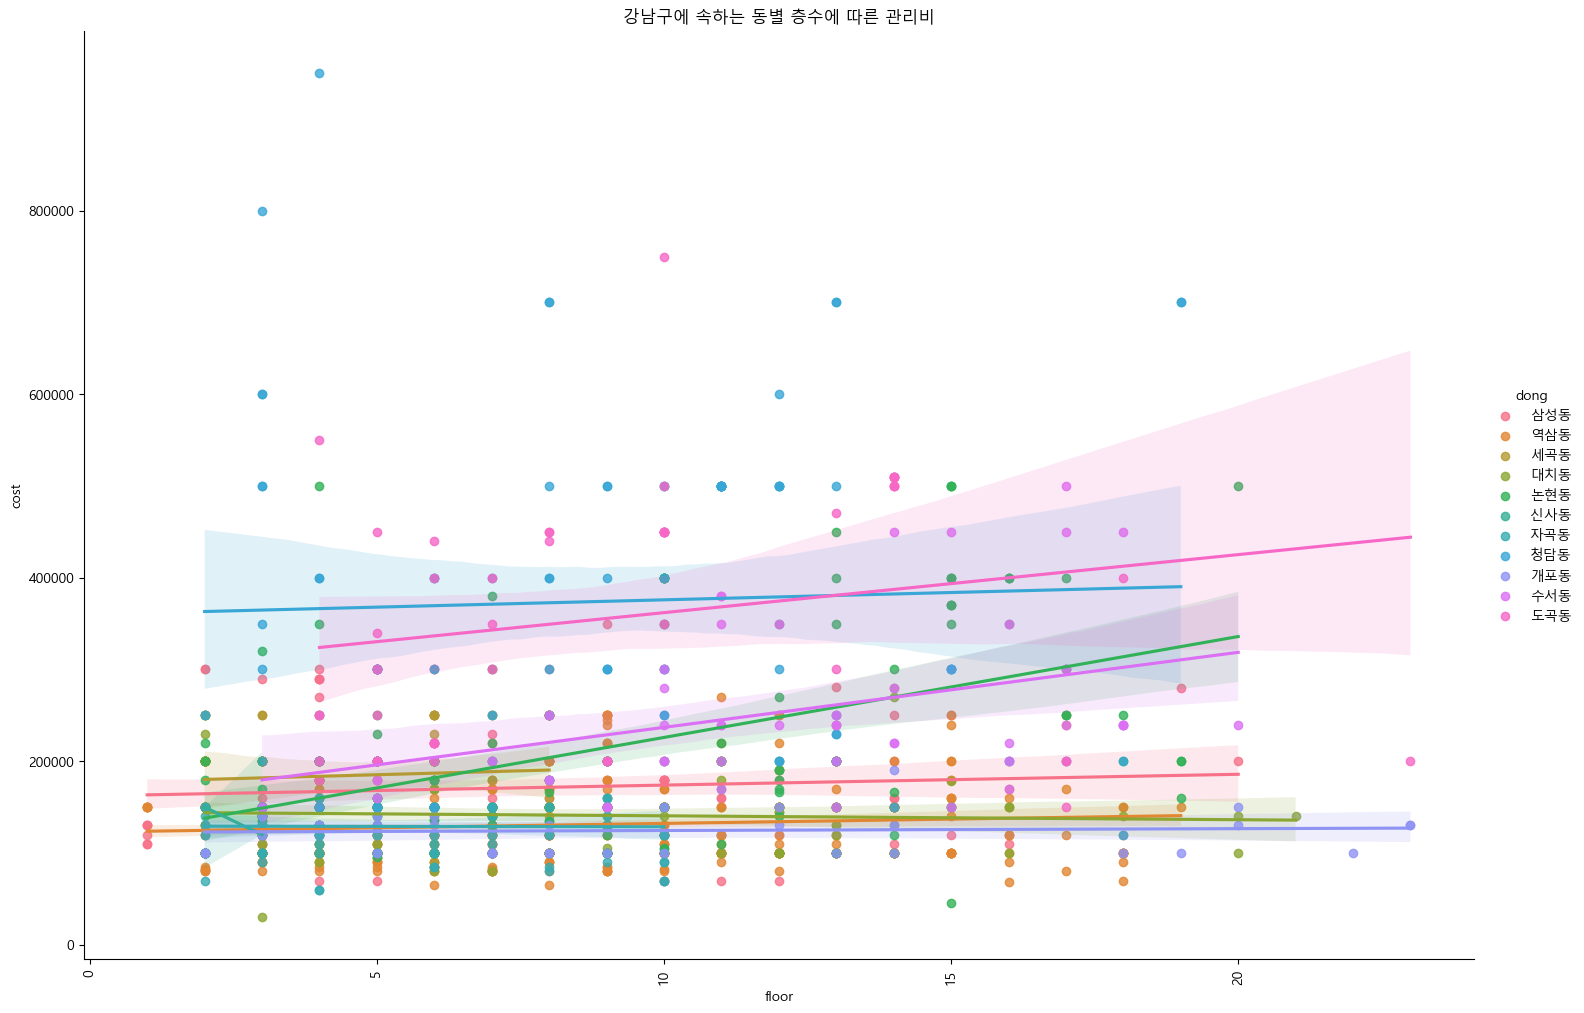

In [128]:
plt.figure(figsize =(30,20))
new_final_강남 = new_final[new_final['gu']== '강남구']
new_final_강남 = new_final_강남.groupby(['dong'])[['opst','cost','floor','gu']].apply(lambda x : x).reset_index()
new_final_강남 = new_final_강남.drop(index = list(new_final_강남[new_final_강남['floor']>25].index))
new_final_강남_x = new_final_강남.drop(index = list(new_final_강남[new_final_강남['floor'].between(-10,0)].index))


#sns.scatterplot(x='floor', y='cost', data = new_final.sort_values('floor'))
sns.lmplot(x ='floor', y = 'cost', data = new_final_강남_x.sort_values('floor'), hue = 'dong',height = 10,aspect =1.5)
plt.title("강남구에 속하는 동별 층수에 따른 관리비")
plt.xticks(rotation = 90)
plt.show()

<Figure size 3000x2000 with 0 Axes>

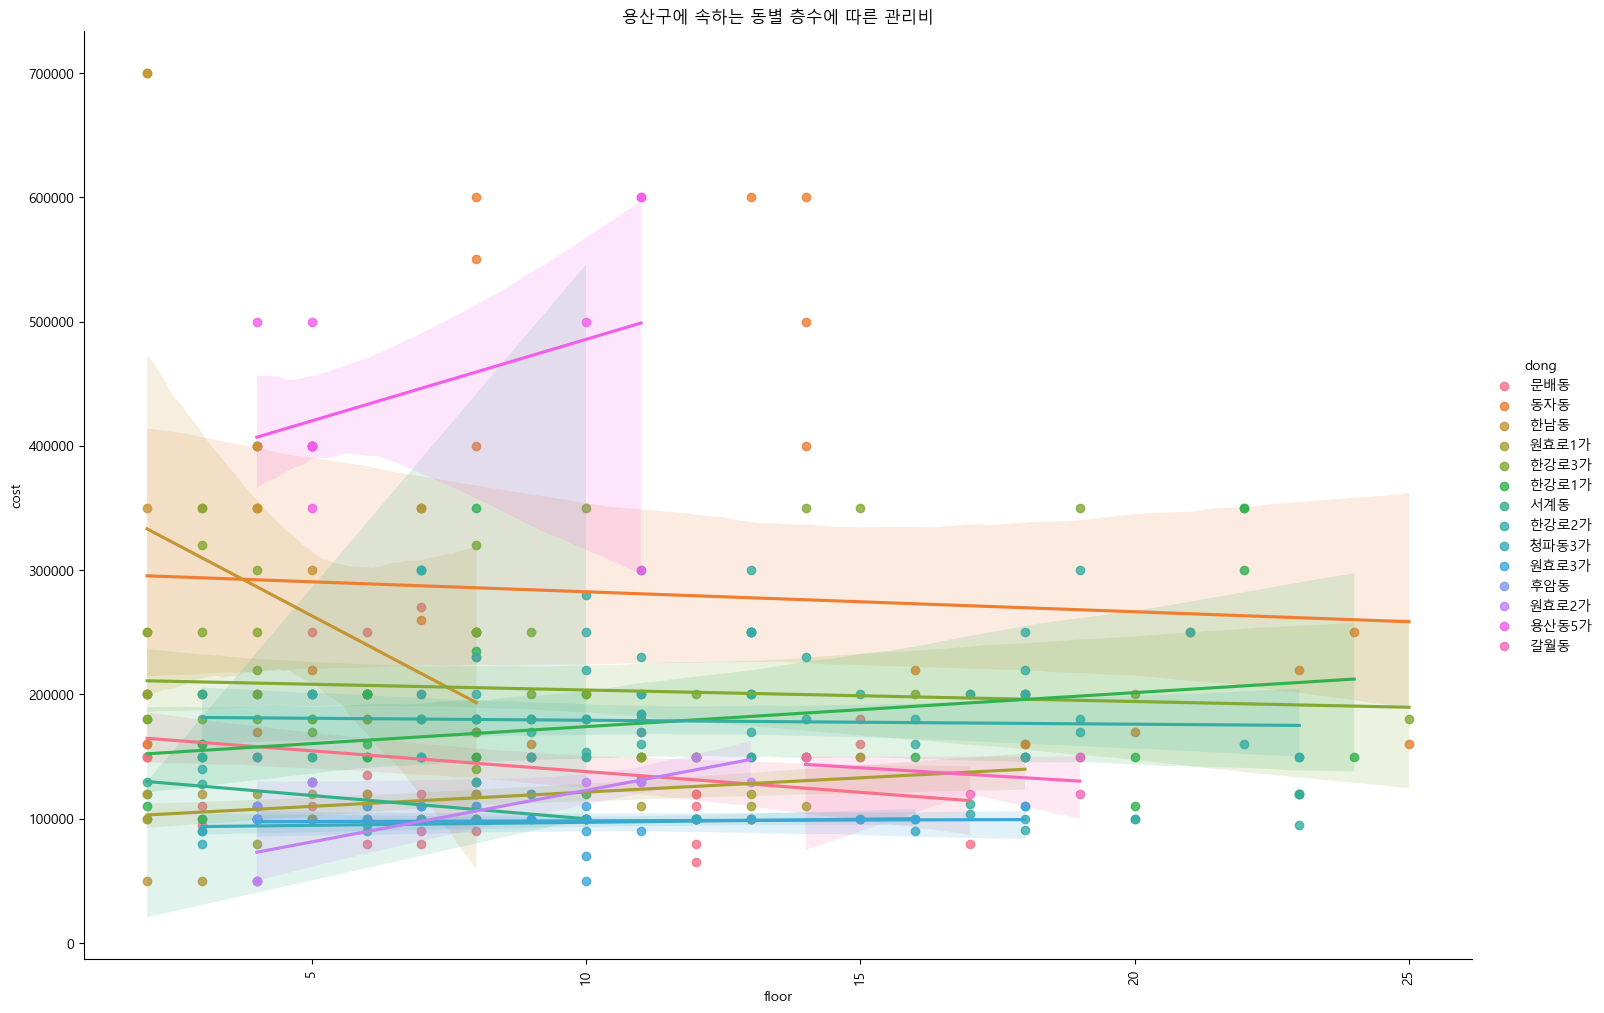

In [129]:
plt.figure(figsize =(30,20))
new_final_용산 = new_final[new_final['gu']== '용산구']
new_final_용산 = new_final_용산.groupby(['dong'])[['opst','cost','floor','gu']].apply(lambda x : x).reset_index()
new_final_용산 = new_final_용산.drop(index = list(new_final_용산[new_final_용산['floor']>25].index))
new_final_용산_x = new_final_용산.drop(index = list(new_final_용산[new_final_용산['floor'].between(-10,0)].index))

#sns.scatterplot(x='floor', y='cost', data = new_final.sort_values('floor'))
sns.lmplot(x ='floor', y = 'cost', data = new_final_용산_x.sort_values('floor'), hue = 'dong',height = 10,aspect =1.5)
plt.title("용산구에 속하는 동별 층수에 따른 관리비")
plt.xticks(rotation = 90)
plt.show()

<Figure size 3000x2000 with 0 Axes>

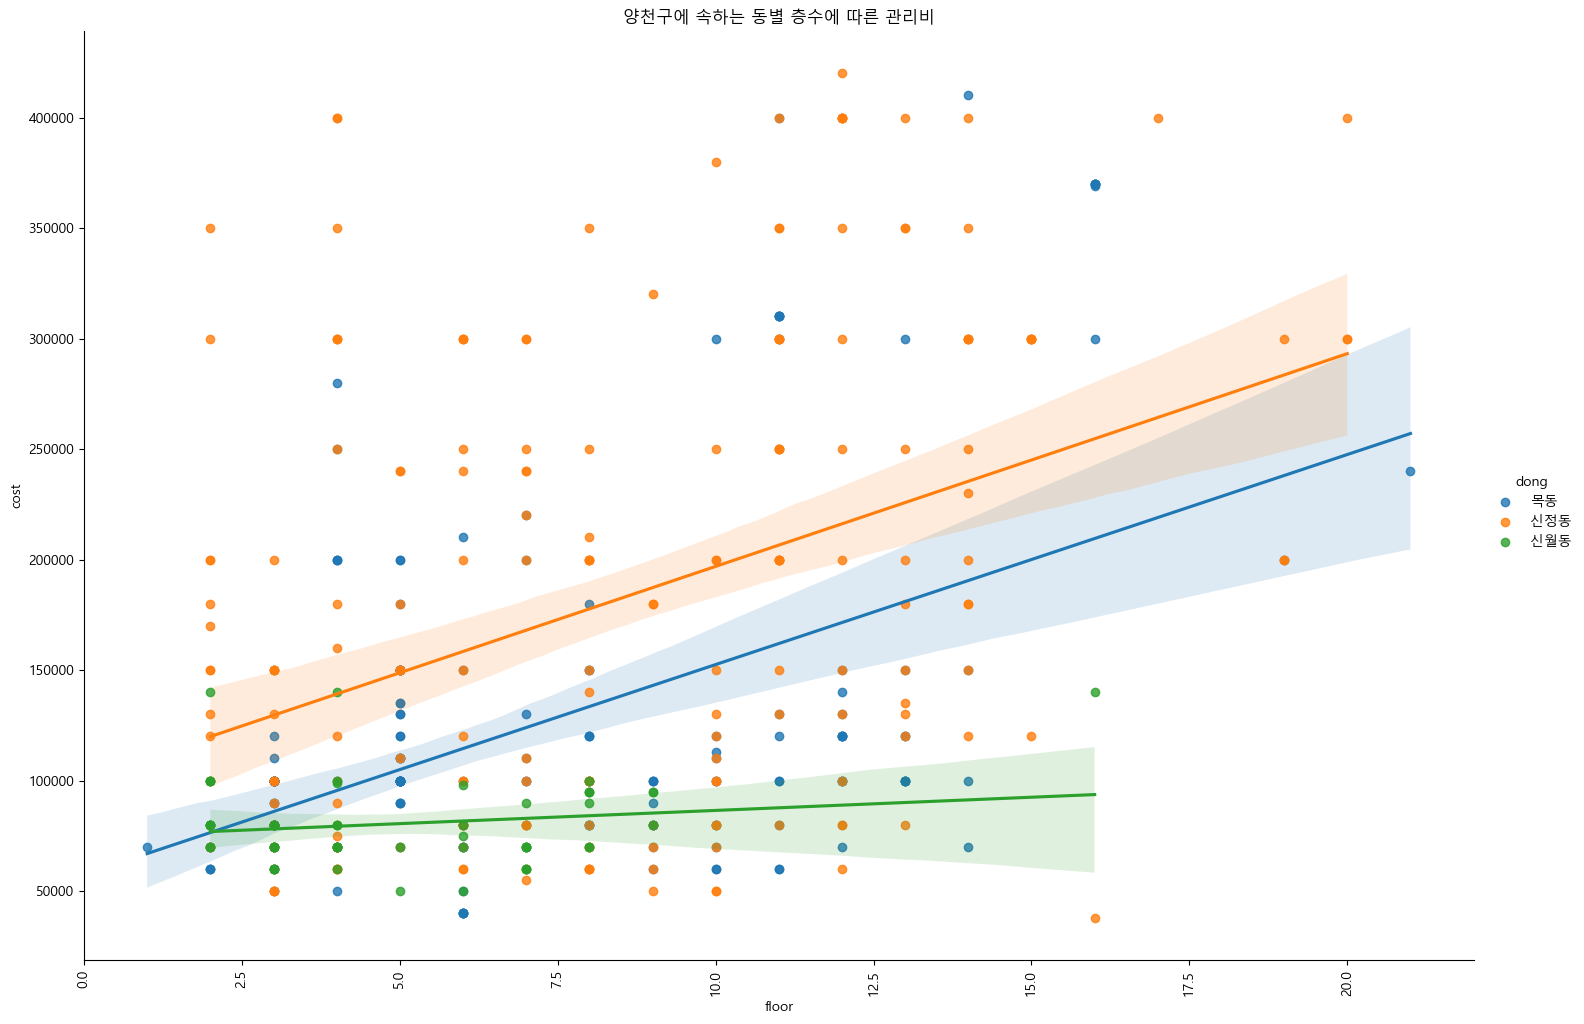

In [130]:

plt.figure(figsize =(30,20))
new_final_양천 = new_final[new_final['gu']== '양천구']
new_final_양천 = new_final_양천.groupby(['dong'])[['opst','cost','floor','gu']].apply(lambda x : x).reset_index()
new_final_양천 = new_final_양천.drop(index = list(new_final_양천[new_final_양천['floor']>25].index))
new_final_양천_x = new_final_양천.drop(index = list(new_final_양천[new_final_양천['floor'].between(-10,0)].index))

#sns.scatterplot(x='floor', y='cost', data = new_final.sort_values('floor'))
sns.lmplot(x ='floor', y = 'cost', data = new_final_양천_x.sort_values('floor'), hue = 'dong',height = 10,aspect =1.5)
plt.title("양천구에 속하는 동별 층수에 따른 관리비")
plt.xticks(rotation = 90)
plt.show()

미미한 상관관계를 보인다고 판단은 할 수 있으나 고중저라는 변수를 임의의 존재하지 않는 실수로 정의했기 때문에 분석한 결과가 좋다고는 판단 할 수 없다.